かの有名な言語処理100本ノック、吾輩は猫であるでなく、こころでやってみました。

In [9]:
!python --version

Python 3.7.6


In [10]:
import zipfile
import MeCab
import ngram
import numpy as np
import matplotlib.pyplot as plt
import re

データはこちらからhttps://www.aozora.gr.jp/cards/000148/card773.html

zipファイルなので、解凍

In [11]:
with zipfile.ZipFile('C:\\Users\Miyu Oba\Downloads\\773_ruby_5968.zip') as pass_zip:
    pass_zip.extractall()

In [12]:
with open('./kokoro.txt',mode='rt',encoding='cp932') as f:
    all_data=f.readlines()

In [13]:
all_data=''.join(all_data)
all_data=all_data.split('\n')

In [14]:
for line in all_data:
    if re.search('\［.*?\］.*?\［.*?\］',line):
        all_data.remove(line)
    if line=='':
        all_data.remove(line)
    
all_data=list(map(lambda x: re.sub('《.*?\》','',x),all_data))
all_data=all_data[12:]
all_data=all_data[:-12]

In [15]:
all_data=list(map(lambda x: re.sub('\\u3000','',x),all_data))
all_data=list(map(lambda x: re.sub('\｜','',x),all_data))
all_sentence=''.join(all_data)

In [16]:
with open('newkokoro.txt','w',encoding='utf-8') as input_file:
    input_file.write(all_sentence)

In [17]:
_m=MeCab.Tagger("-Ochasen")
with open('newkokoro.txt',encoding='utf-8')as input_file:
    with open('newkokoro.txt.mecab',mode='w',encoding='utf-8')as output_file:
        output_file.write(_m.parse(input_file.read()))

30. 形態素解析結果の読み込み

In [139]:
def tabbed_str_to_dict(tabbed_str:str):
    elements = tabbed_str.split()
    if 0<len(elements)<4:
        return {'surface':elements[0],'base':'','pos':'','pos1':''}
    else:
        return {'surface':elements[0],'base':elements[1],'pos':elements[2],'pos1':elements[3]}
def morphemes_to_sentence(morphemes:list):
    sentences = []
    sentence = []
    
    for morpheme in morphemes:
        sentence.append(morpheme)
        if morpheme['pos1'] == '記号-句点':
            sentences.append(sentence)
            sentence=[]
    return sentences

with open('newkokoro.txt.mecab',encoding='utf-8') as mecabed:
    morphemes=[tabbed_str_to_dict(line)for line in mecabed]
sentences=morphemes_to_sentence(morphemes)
print(morphemes[::1000])
print('-----------')
print('-----------')
print(sentences[::1000])

[{'surface': '先生', 'base': 'センセイ', 'pos': '先生', 'pos1': '名詞-一般'}, {'surface': '。', 'base': '。', 'pos': '。', 'pos1': '記号-句点'}, {'surface': 'まるで', 'base': 'マルデ', 'pos': 'まるで', 'pos1': '副詞-一般'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '助詞-連体化'}, {'surface': '苦しん', 'base': 'クルシン', 'pos': '苦しむ', 'pos1': '動詞-自立'}, {'surface': 'ただ', 'base': 'タダ', 'pos': 'ただ', 'pos1': '名詞-一般'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '名詞-非自立-一般'}, {'surface': '。', 'base': '。', 'pos': '。', 'pos1': '記号-句点'}, {'surface': '、', 'base': '、', 'pos': '、', 'pos1': '記号-読点'}, {'surface': '私', 'base': 'ワタシ', 'pos': '私', 'pos1': '名詞-代名詞-一般'}, {'surface': 'は', 'base': 'ハ', 'pos': 'は', 'pos1': '助詞-係助詞'}, {'surface': 'いわゆる', 'base': 'イワユル', 'pos': 'いわゆる', 'pos1': '連体詞'}, {'surface': '優しかっ', 'base': 'ヤサシカッ', 'pos': '優しい', 'pos1': '形容詞-自立'}, {'surface': 'た', 'base': 'タ', 'pos': 'た', 'pos1': '助動詞'}, {'surface': 'だ', 'base': 'ダ', 'pos': 'だ', 'pos1': '助動詞'}, {'surface': '加え', 'base': 'クワエ', 'pos': '加える', 'pos1'

In [140]:
surface_lst=[morpheme['surface'] for morpheme in morphemes if morpheme['pos1'].find('動詞')==0]
base_lst=[morpheme['base'] for morpheme in morphemes if morpheme['pos1'].find('動詞')==0]
sahen_lst=[morpheme['surface'] for morpheme in morphemes if morpheme['pos1']=='名詞-サ変接続']

In [147]:
print(surface_lst[::100])
print(base_lst[::100])
print(sahen_lst[::100])

['わす', '付い', '切れ', 'し', '貰っ', '懸っ', 'いっ', 'し', '描き', '動い', '浮かされ', '出る', '出', '鳴っ', 'し', 'し', 'られる', 'い', 'い', '来', 'いっ', '行く', '感じ', '取り払わ', '考え', '出し', '試みる', '寝る', '貰う', 'てる', '指す', 'あり', 'い', '持っ', '行っ', 'もらっ', 'し', 'いわ', 'する', '繰り返し', 'し', 'いけ', '帰っ', '纏まろ', 'い', '呼ぼ', '受け取っ', 'し', '取り合う', '心得', '引っ繰り返っ', 'し', 'れ', 'れ', 'し', 'あっ', 'する', '起き', 'い', '待ち受け', '懸け離れ', '起し', 'いる', '行っ', '急が', '寄こし', 'でき', 'くれ', 'なり', 'い', 'れ', 'なっ', 'れ', '帰っ', 'がら', '行こ', '抜い', '見渡す', '建て', 'ある', 'い', '来る', 'い', '信じ', '感じ', 'み', 'しよ', 'て', '知れ', '書き残す', '見受け', 'し', '見せ', '立ち', 'い', '話し', '考え', 'なる', '聞か', '生じ', '踏み外し', '入っ', '見かね', '見', '注ぎ', '忘れる', '話しかけ', 'いう', 'い', 'なり', '譲ら', '進み', 'なっ', 'あり', 'しよ', '開ける', '帰っ', '坐', '帰る', '答え', '切っ', '散らし', 'さ', 'い', '富ん', '吹かし', 'し', '歩き', 'し', '聞く', '敷い', '見え', '覚まし', '知れ', 'し', 'し', 'し', '盛り潰そ', 'れ', 'いる', '聞か', '下さい', '考え', 'やり']
['ワス', 'ツイ', 'キレ', 'シ', 'モラッ', 'カカッ', 'イッ', 'シ', 'エガキ', 'ウゴイ', 'ウカサレ', 'デル', 'デ', 'ナッ', 'シ', 'シ', 'ラレル', 'イ', 'イ', 'キ', 'イッ', 'イク', '

In [151]:
def ngramed_list(lst:list,n:int=3):
    index=ngram.NGram(N=n)
    return [term for term in index.ngrams(lst)]
def is_noun_no_noun(words:list):
    return (type(words==list))and (len(words)==3) and \
           (words[0]['pos1'].find('名詞')==0)and\
            (words[1]['surface']=='の') and\
            (words[2]['pos1'].find('名詞')==0)
noun_no_noun=[ngrams for ngrams in ngramed_list(morphemes)if is_noun_no_noun(ngrams)]
noun_no_noun=[''.join([word['surface'] for word in ngram])for ngram in noun_no_noun]
print(noun_no_noun[::100])

['これらの墓標', '何の同情', '先生の思想', '峯のよう', '胸の奥', '先生の返事', '私の眼', '家族の人数', '先生の過去', '自分の死', '己の身体', '旗竿の球', '油蝉の声', '妹の夫', 'のの手前', '病人の枕辺', '母の頭', '内輪の話', 'ままの姿', '琴の音', '片方の態度', '同様の結果', '彼の性格', '室の外', '自分の心', '九月の中頃', '彼のどこ', '仕切りの襖', '私の顔', '男のよう', '義眼のよう', '私の幸福', '明治の影響']


In [154]:
def get_frequency(words: list):
    frequency={}
    for word in words:
        if frequency.get(word):
            frequency[word]+=1
        else:
            frequency[word]=1
    return frequency

frequency=get_frequency([morpheme['surface'] for morpheme in morphemes])
frequency=[(k,v)for k,v in sorted(frequency.items(),key=lambda x:x[1],reverse=True)]
print(frequency[:50:])

[('の', 5595), ('た', 5140), ('。', 4459), ('は', 3989), ('に', 3917), ('、', 3515), ('て', 3259), ('を', 3060), ('私', 2591), ('が', 2118), ('と', 1948), ('で', 1421), ('も', 1271), ('し', 1234), ('です', 1126), ('まし', 1032), ('ない', 995), ('い', 846), ('から', 844), ('「', 691), ('な', 680), ('その', 648), ('」', 643), ('か', 633), ('だ', 580), ('ん', 572), ('事', 559), ('う', 530), ('先生', 511), ('よう', 491), ('へ', 480), ('いる', 468), ('なかっ', 440), ('Ｋ', 411), ('それ', 398), ('もの', 386), ('奥さん', 385), ('ませ', 364), ('時', 357), ('人', 356), ('でし', 343), ('という', 320), ('あっ', 319), ('する', 309), ('彼', 305), ('れ', 285), ('父', 269), ('自分', 260), ('いっ', 259), ('また', 254)]


C:\Anaconda3\envs\jupyternotebook\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\jupyternotebook\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\jupyternotebook\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\jupyternotebook\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\jupyternotebook\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\jupyternotebook\lib\site-packages\matplotlib\backends\backend_

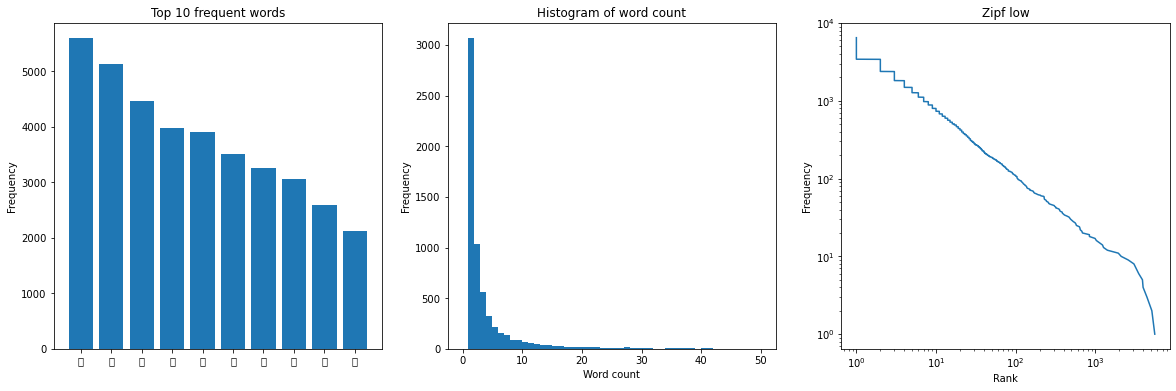

In [157]:
fig = plt.figure(figsize=(20,6))
words = [f[0]for f in frequency[0:10]]
x_pos = np.arange(len(words))

ax1=fig.add_subplot(131)
ax1.bar(x_pos, [f[1] for f in frequency[0:10]])
ax1.set_xticks(x_pos)
ax1.set_xticklabels(words)
ax1.set_ylabel('Frequency')
ax1.set_title('Top 10 frequent words')

freq=list(dict(frequency).values())
#dict.values()はリストに入る
freq.sort(reverse=True)

ax2=fig.add_subplot(132)
ax2.hist(freq, bins=50,range=(0,50))
ax2.set_title('Histogram of word count')
ax2.set_xlabel('Word count')
ax2.set_ylabel('Frequency')

rank = list(range(1,len(freq)+1))
ax3=fig.add_subplot(133)
ax3.plot(freq,rank)
ax3.set_xlabel('Rank')
ax3.set_ylabel('Frequency')
ax3.set_title('Zipf low')
ax3.set_xscale('log')
ax3.set_yscale('log')

参考にさせていただきました。ありがとうございました。https://hytmachineworks.hatenablog.com/entry/2017/10/13/230350